## Importing Required Libraries

In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data=pd.read_csv("/content/Alphabets_data.csv")

# EDA

In [ ]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [ ]:
len(data["letter"].unique())

26

## Visualizations

<Axes: ylabel='count'>

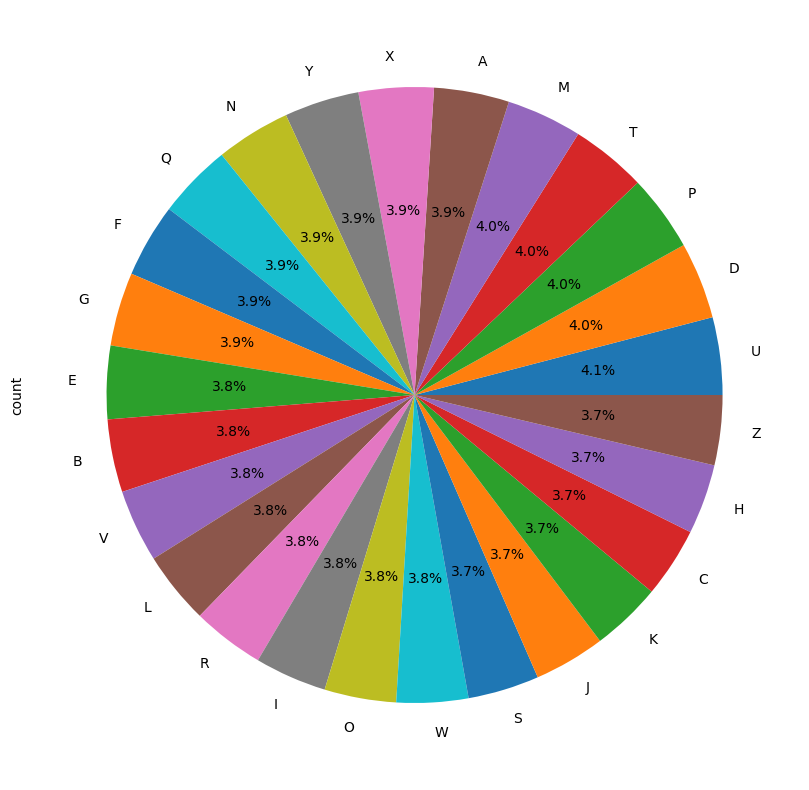

In [ ]:
fig=plt.figure(figsize=(10,10))
data["letter"].value_counts().plot(kind="pie",autopct="%1.1f%%")

In [ ]:
data.iloc[:,1:].corr()


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
xbox,1.000000,0.757793,0.851514,0.672764,0.619097,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147
ybox,0.757793,1.000000,0.671912,0.823207,0.555067,0.045690,-0.040925,-0.025019,0.096478,0.159954,-0.054648,-0.007568,0.274431,-0.001336,0.230883,-0.042741
width,0.851514,0.671912,1.000000,0.660215,0.765716,0.061959,0.024832,-0.098611,0.057074,0.115018,0.011694,-0.045009,0.557251,0.045658,0.260285,-0.118273
height,0.672764,0.823207,0.660215,1.000000,0.644366,0.042844,-0.020072,0.082383,0.059032,0.012458,-0.011991,0.026386,0.265243,0.025359,0.297545,-0.018853
onpix,0.619097,0.555067,0.765716,0.644366,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.072941,-0.038858,0.627507,0.017649,0.492653,-0.062969
xbar,-0.032595,0.045690,0.061959,0.042844,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816
ybar,0.045545,-0.040925,0.024832,-0.020072,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900
x2bar,0.014306,-0.025019,-0.098611,0.082383,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902
y2bar,0.052086,0.096478,0.057074,0.059032,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335
xybar,0.148056,0.159954,0.115018,0.012458,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.057988,-0.106759,-0.175676,0.029419,-0.087019,-0.114223


### Heatmap

<Axes: >

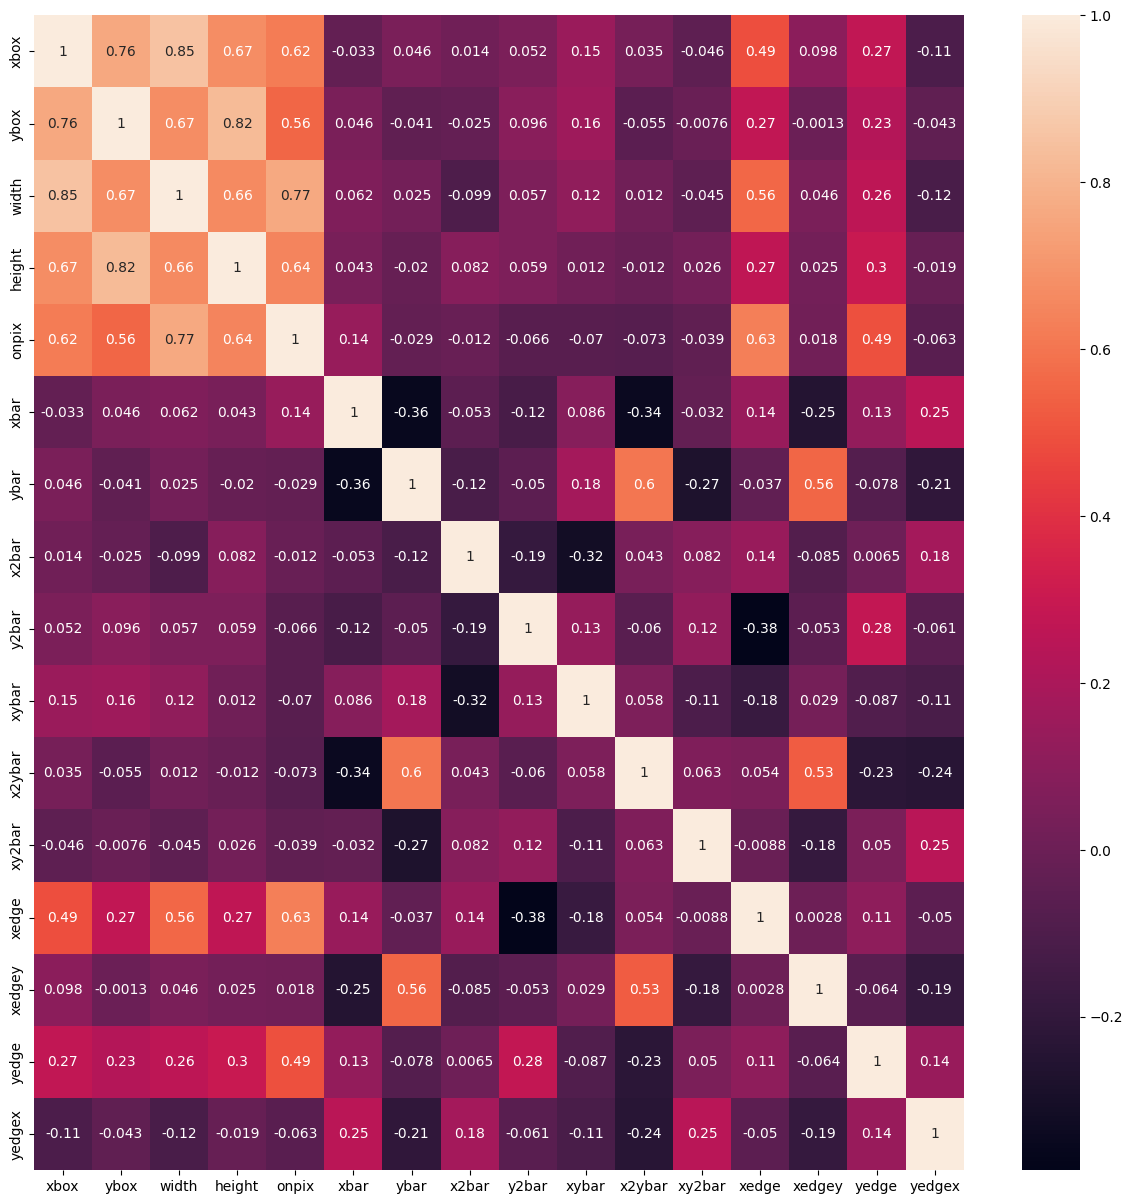

In [ ]:
fig=plt.figure(figsize=(15,15))
sns.heatmap(data.iloc[:,1:].corr(),annot=True)

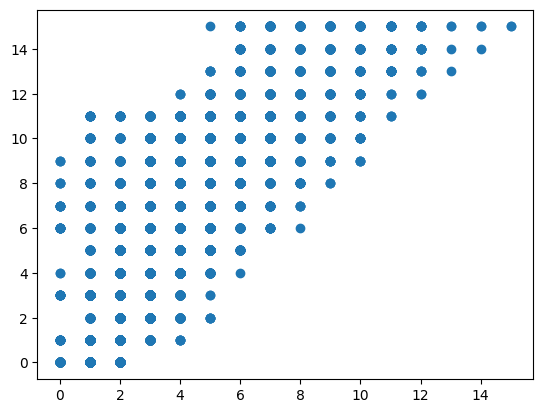

In [ ]:
plt.scatter(data["xbox"],data["ybox"])

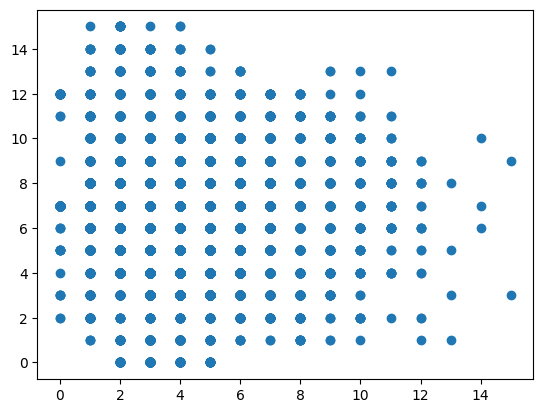

In [ ]:
plt.scatter(data["xbox"],data["xbar"])

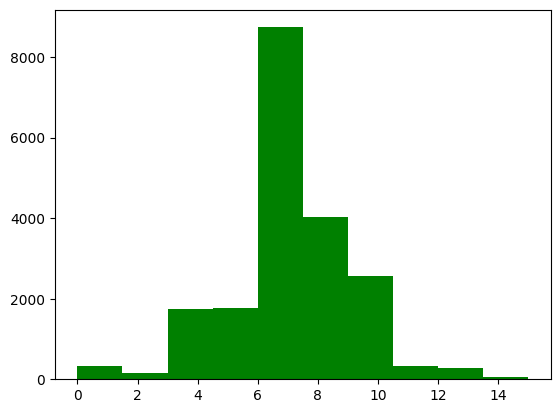

In [ ]:
plt.hist(data["xbar"],facecolor="green")
plt.show()

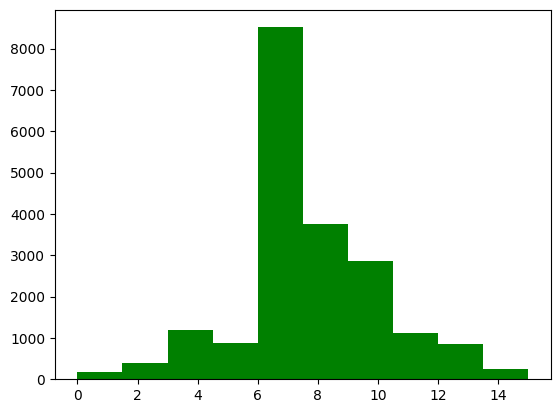

In [ ]:
plt.hist(data["ybar"],facecolor="green")
plt.show()

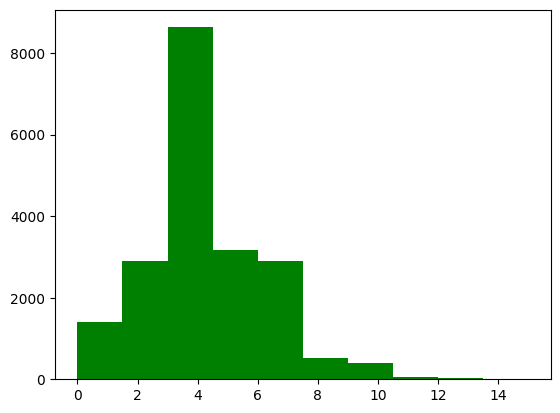

In [ ]:
plt.hist(data["xbox"],facecolor="green")
plt.show()

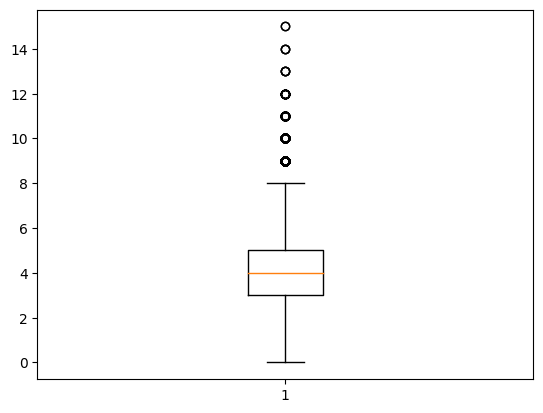

In [ ]:
plt.boxplot(data["xbox"])
plt.show()

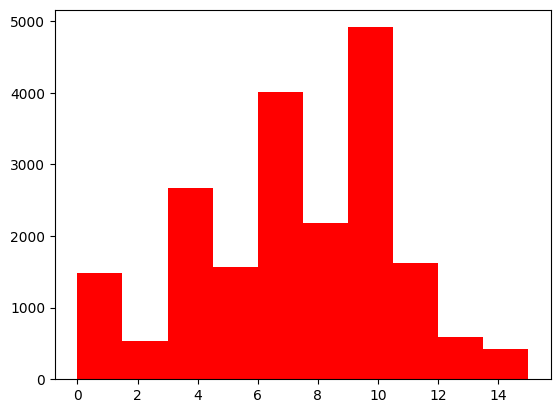

In [ ]:
plt.hist(data["ybox"],facecolor="red")
plt.show()

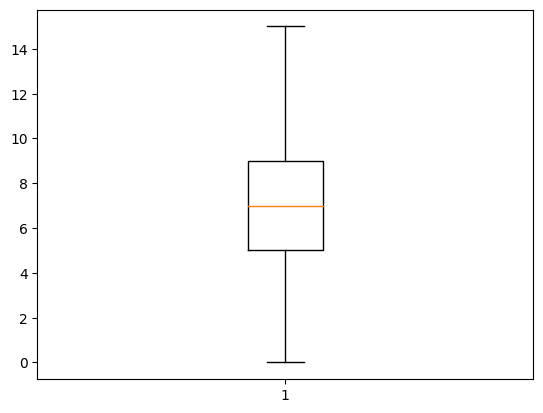

In [ ]:
plt.boxplot(data["ybox"])
plt.show()

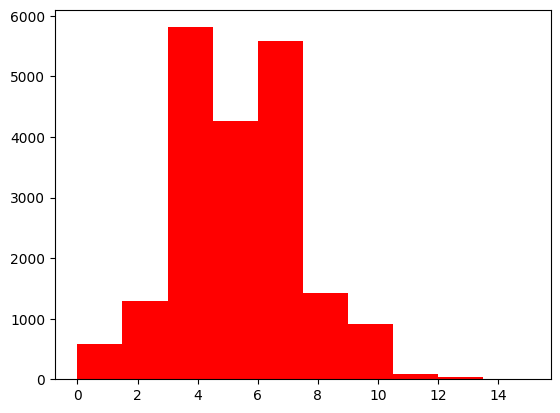

In [ ]:
plt.hist(data["width"],facecolor="red")
plt.show()

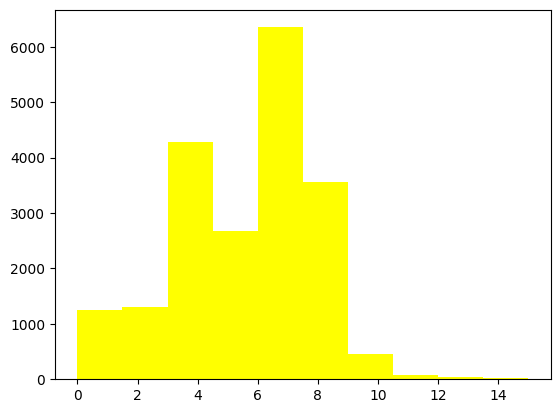

In [ ]:
plt.hist(data["height"],facecolor="yellow")
plt.show()

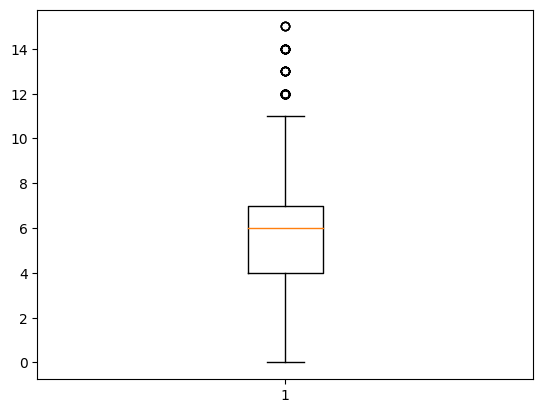

In [ ]:
plt.boxplot(data["height"])
plt.show()

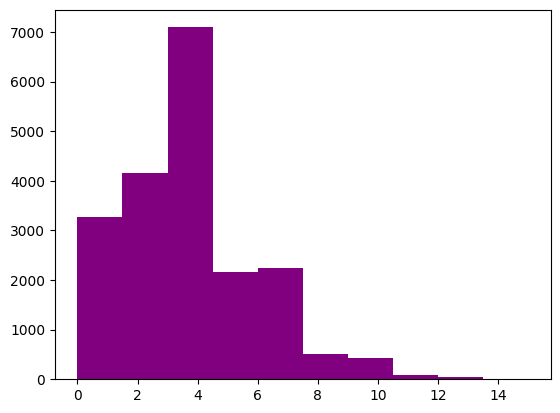

In [ ]:
plt.hist(data["onpix"],facecolor="purple")
plt.show()

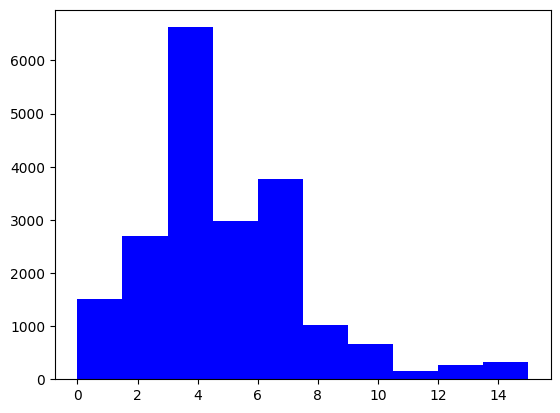

In [ ]:
plt.hist(data["x2bar"],facecolor="blue")
plt.show()

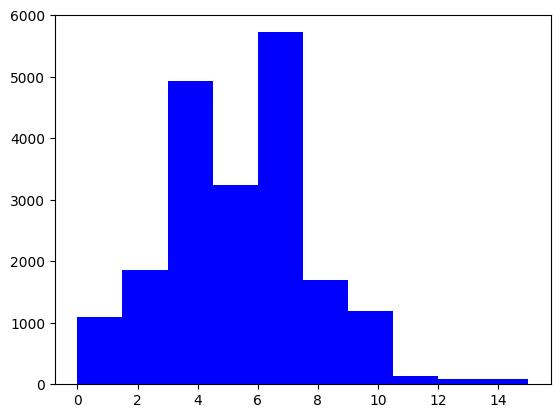

In [ ]:
plt.hist(data["y2bar"],facecolor="blue")
plt.show()

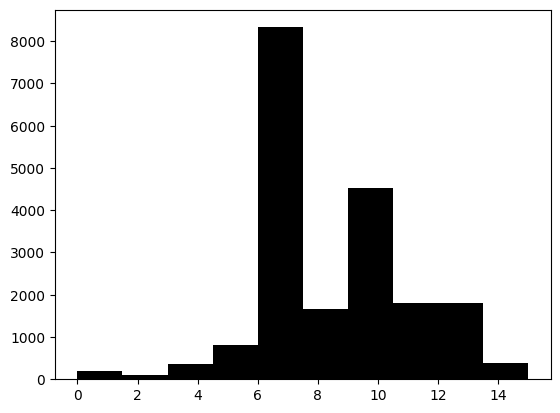

In [ ]:
plt.hist(data["xybar"],facecolor="black")
plt.show()

In [ ]:
data.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

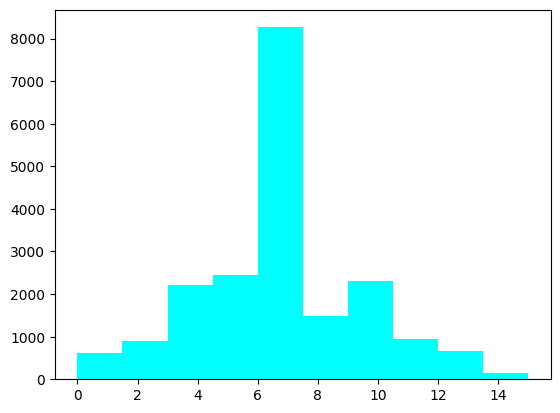

In [ ]:
plt.hist(data["x2ybar"],facecolor="cyan")
plt.show()

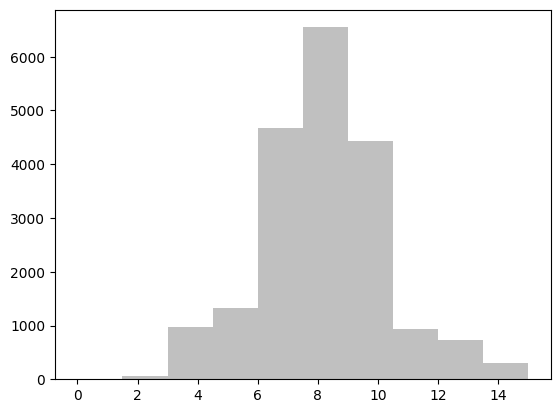

In [ ]:
plt.hist(data["xy2bar"],facecolor="silver")
plt.show()

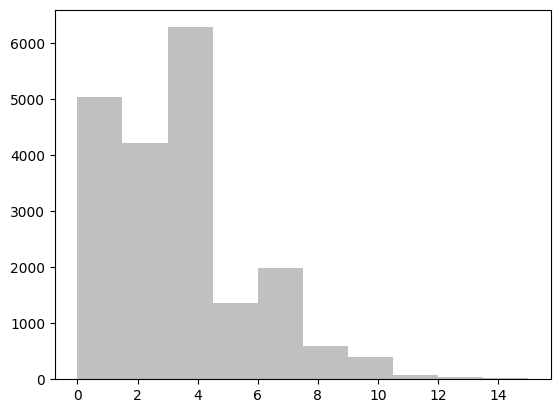

In [ ]:
plt.hist(data["xedge"],facecolor="silver")
plt.show()

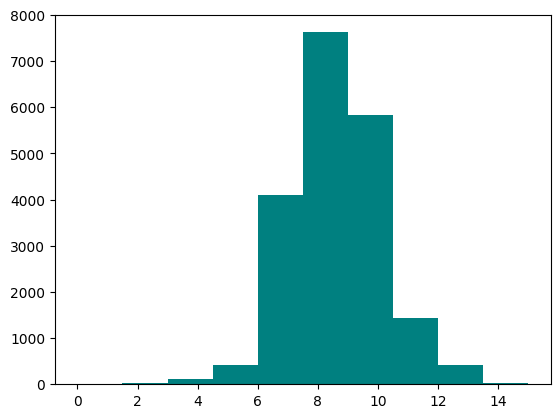

In [ ]:
plt.hist(data["xedgey"],facecolor="teal")
plt.show()

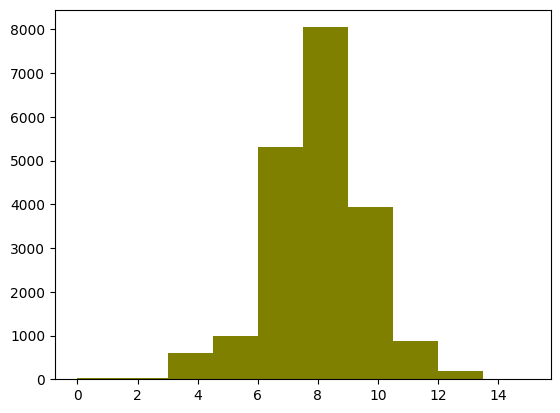

In [ ]:
plt.hist(data["yedgex"],facecolor="olive")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


### Checking for Missing Values

In [ ]:
data.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


### Identifing and Removing Duplicates

In [ ]:
data[data.duplicated(keep=False)]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
22,S,3,2,3,3,2,8,8,7,5,7,5,7,2,8,9,8
37,P,3,6,4,4,2,4,14,8,1,11,6,3,0,10,4,8
51,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
60,N,3,3,3,5,2,7,7,13,2,5,6,8,5,8,0,8
67,E,2,3,3,2,2,7,7,5,7,7,6,8,2,8,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [ ]:
data[data.duplicated(keep="first")]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [ ]:
data.drop_duplicates(keep="first",inplace=True)

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.drop(["index"],axis=1,inplace=True)

In [ ]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,T,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
18664,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
18665,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
18666,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18668 entries, 0 to 18667
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  18668 non-null  object
 1   xbox    18668 non-null  int64 
 2   ybox    18668 non-null  int64 
 3   width   18668 non-null  int64 
 4   height  18668 non-null  int64 
 5   onpix   18668 non-null  int64 
 6   xbar    18668 non-null  int64 
 7   ybar    18668 non-null  int64 
 8   x2bar   18668 non-null  int64 
 9   y2bar   18668 non-null  int64 
 10  xybar   18668 non-null  int64 
 11  x2ybar  18668 non-null  int64 
 12  xy2bar  18668 non-null  int64 
 13  xedge   18668 non-null  int64 
 14  xedgey  18668 non-null  int64 
 15  yedge   18668 non-null  int64 
 16  yedgex  18668 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.4+ MB


## Standardization

In [ ]:
scale=StandardScaler()
def scaling(df):
  for i in df.columns:
    if df[i].dtype=="int64":
      df[i]=scale.fit_transform(df[[i]])
  return df


In [ ]:
scaling(data)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,-1.144417,0.237070,-1.178294,-0.232716,-1.231474,0.531756,2.358246,-1.746100,0.344235,-0.953149,1.351557,0.035798,-1.347535,-0.223412,-1.494712,0.130096
1,I,0.451855,1.491943,-1.178294,0.685459,-0.768617,1.515924,-1.090370,0.158195,-0.517819,1.882192,-1.315513,0.510429,-0.486890,-0.223412,0.079965,1.336868
2,D,-0.080235,1.178224,0.372167,1.144546,1.082808,1.515924,-0.659293,-0.984382,0.344235,0.667046,-1.315513,-0.438833,-0.056568,-0.858409,-0.313704,0.733482
3,N,1.516037,1.178224,0.372167,0.226371,-0.305761,-0.944497,0.633938,-0.222664,0.344235,-1.763246,-0.934503,0.985060,1.234399,1.046582,-0.707373,0.130096
4,G,-1.144417,-1.958957,-1.178294,-2.069066,-1.231474,0.531756,-0.659293,0.539054,0.344235,-0.953149,-0.553493,0.510429,-0.917213,-0.858409,0.473635,1.336868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,T,0.451855,0.237070,0.888987,0.685459,1.545665,0.039671,0.633938,-0.222664,1.206289,-0.548100,0.208527,0.035798,-0.056568,1.046582,1.654643,-1.076676
18664,D,-1.144417,-1.645239,-1.178294,-1.150891,-0.768617,0.039671,-0.228216,0.919913,0.344235,-0.953149,-0.172483,-1.862725,-0.486890,-0.223412,-0.313704,-0.473290
18665,C,1.516037,0.864506,1.405808,1.144546,0.157095,-1.436582,0.202861,0.539054,1.637317,1.477143,0.970547,2.408953,-0.486890,0.411585,-0.313704,-0.473290
18666,T,0.983946,0.550788,0.372167,0.685459,0.619952,-0.452413,1.496092,-0.603523,0.775262,1.072095,0.970547,-1.388094,-0.486890,2.316576,-0.707373,-2.283449


## Label Encoding

In [ ]:
data["letter"]=LabelEncoder().fit_transform(data["letter"])

In [ ]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,-1.144417,0.237070,-1.178294,-0.232716,-1.231474,0.531756,2.358246,-1.746100,0.344235,-0.953149,1.351557,0.035798,-1.347535,-0.223412,-1.494712,0.130096
1,8,0.451855,1.491943,-1.178294,0.685459,-0.768617,1.515924,-1.090370,0.158195,-0.517819,1.882192,-1.315513,0.510429,-0.486890,-0.223412,0.079965,1.336868
2,3,-0.080235,1.178224,0.372167,1.144546,1.082808,1.515924,-0.659293,-0.984382,0.344235,0.667046,-1.315513,-0.438833,-0.056568,-0.858409,-0.313704,0.733482
3,13,1.516037,1.178224,0.372167,0.226371,-0.305761,-0.944497,0.633938,-0.222664,0.344235,-1.763246,-0.934503,0.985060,1.234399,1.046582,-0.707373,0.130096
4,6,-1.144417,-1.958957,-1.178294,-2.069066,-1.231474,0.531756,-0.659293,0.539054,0.344235,-0.953149,-0.553493,0.510429,-0.917213,-0.858409,0.473635,1.336868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,19,0.451855,0.237070,0.888987,0.685459,1.545665,0.039671,0.633938,-0.222664,1.206289,-0.548100,0.208527,0.035798,-0.056568,1.046582,1.654643,-1.076676
18664,3,-1.144417,-1.645239,-1.178294,-1.150891,-0.768617,0.039671,-0.228216,0.919913,0.344235,-0.953149,-0.172483,-1.862725,-0.486890,-0.223412,-0.313704,-0.473290
18665,2,1.516037,0.864506,1.405808,1.144546,0.157095,-1.436582,0.202861,0.539054,1.637317,1.477143,0.970547,2.408953,-0.486890,0.411585,-0.313704,-0.473290
18666,19,0.983946,0.550788,0.372167,0.685459,0.619952,-0.452413,1.496092,-0.603523,0.775262,1.072095,0.970547,-1.388094,-0.486890,2.316576,-0.707373,-2.283449


# Applying the Model

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(30,input_dim=16,kernel_initializer="uniform",activation="relu"))
  model.add(Dropout(0.1))
  model.add(Dense(15,activation="relu"))
  model.add(Dropout(0.1))
  model.add(Dense(26,activation="softmax"))

  adam=Adam(learning_rate=0.01)
  model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
  return model

In [ ]:
model=KerasClassifier(model=create_model,verbose=0,batch_size=40,epochs=50)


## Splitting the Dataset into Training and Testing sets

In [ ]:
y=data.iloc[:,0]
x=data.iloc[:,1:]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=36)

In [ ]:
model.fit(x_train,y_train)

KerasClassifier(
	model=<function create_model at 0x7c781c22dbd0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=40
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

In [ ]:
y_pred=model.predict(x_test)

## Evaluation Metrics

In [ ]:
accuracy_score(y_test,y_pred)

0.824317086234601

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       236
           1       0.66      0.92      0.77       214
           2       0.96      0.81      0.88       235
           3       0.78      0.84      0.81       203
           4       0.71      0.75      0.73       211
           5       0.87      0.75      0.80       238
           6       0.70      0.79      0.74       228
           7       0.80      0.64      0.71       206
           8       0.88      0.69      0.77       143
           9       0.94      0.84      0.89       230
          10       0.85      0.85      0.85       228
          11       0.98      0.78      0.87       206
          12       0.86      0.92      0.89       239
          13       0.88      0.81      0.84       196
          14       0.72      0.83      0.77       207
          15       0.90      0.89      0.90       239
          16       0.85      0.83      0.84       236
          17       0.74    

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(30,input_dim=16,kernel_initializer="uniform",activation="relu"))
  model.add(Dropout(0.1))
  model.add(Dense(15,activation="relu"))
  model.add(Dropout(0.1))
  model.add(Dense(26,activation="softmax"))

  adam=Adam(learning_rate=0.01)
  model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
  return model




## Hyperparameter Tuning to find the Best Parameter Values

In [ ]:

model = KerasClassifier(build_fn = create_model,verbose = 1)
# Define the grid search parameters
batch_size = [20,25,30]
epochs = [10,20,40]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(n_splits=3),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3; 1/9] START batch_size=20, epochs=10....................................
Epoch 1/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1447 - loss: 2.9398
Epoch 2/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4524 - loss: 1.7890
Epoch 3/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5294 - loss: 1.4826
Epoch 4/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5677 - loss: 1.3876
Epoch 5/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5941 - loss: 1.2565
Epoch 6/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6234 - loss: 1.1973
Epoch 7/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6270 - loss: 1.1715
Epoch 8/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6475 - loss: 1.1217
Epoch 9/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6472 - loss: 1.1149
Epoch 10/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6662 - loss: 1.076

In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Best : 0.8108209218792665, using {'batch_size': 20, 'epochs': 40}


## Implementing the Model with Best Parameter Values

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(30,input_dim=16,kernel_initializer="uniform",activation="relu"))
  model.add(Dropout(0.1))
  model.add(Dense(15,activation="relu"))
  model.add(Dropout(0.1))
  model.add(Dense(26,activation="softmax"))

  adam=Adam(learning_rate=0.01)
  model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
  return model


In [ ]:
model=KerasClassifier(model=create_model,verbose=0,batch_size=20,epochs=40)

In [ ]:
model.fit(x_train,y_train)

KerasClassifier(
	model=<function create_model at 0x7c7807ea24d0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=20
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=40
	class_weight=None
)

In [ ]:
accuracy_score(y_test,y_pred)

0.824317086234601

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       236
           1       0.66      0.92      0.77       214
           2       0.96      0.81      0.88       235
           3       0.78      0.84      0.81       203
           4       0.71      0.75      0.73       211
           5       0.87      0.75      0.80       238
           6       0.70      0.79      0.74       228
           7       0.80      0.64      0.71       206
           8       0.88      0.69      0.77       143
           9       0.94      0.84      0.89       230
          10       0.85      0.85      0.85       228
          11       0.98      0.78      0.87       206
          12       0.86      0.92      0.89       239
          13       0.88      0.81      0.84       196
          14       0.72      0.83      0.77       207
          15       0.90      0.89      0.90       239
          16       0.85      0.83      0.84       236
          17       0.74    

## Conclusion

The Final Accuracy we got after implementing with the best parameters was 82%.